### Elastic net regression

- It is combination of Ridge and Lasso 
    - it is used to overcome the both disadvantages of ridge and lasso
    - costfunction + (lambda*(slope)^2) + (lambda * |magnitude of slope|)
    - it works well if we have big datasets
- In Ridge 
    -> if model is overfitted we addd some penality as lambda to reduce the slope
- In Lasso
    -> it try to remove unwanted features and also we have some loss of data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
#from sklearn import datasets
from sklearn.datasets import load_boston

In [4]:
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
## to get only keys in dataset
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
## to create a dataframe

boston = pd.DataFrame(df.data)

In [7]:
## to add columns names to dataset
boston.columns = df.feature_names

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
## to add any column in dataset and values from dataset
boston["Target"] = df.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [10]:
## to check whether it has any cleaning
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [11]:
### to select input and output values

x = boston[boston.columns[:-1]]   # to take all columns as input except one column
y = boston['Target']

In [12]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_scale = scale.fit_transform(x)

In [33]:
## to apply model
 
from sklearn.linear_model import ElasticNet

## to split the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,train_size = 0.7,random_state = 25)

model = ElasticNet(alpha = 0.01)
model.fit(x_train,y_train)


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
y_pred = model.predict(x_test)
#y_pred

In [35]:
model.score(x_test,y_test)*100

71.50224140882993

In [36]:
model.score(x_train,y_train)*100

74.33809845067863

In [37]:
model.coef_

array([-0.95810736,  1.1247228 ,  0.06850346,  0.19250701, -2.11066533,
        2.85671598, -0.14188832, -3.1850349 ,  2.85946838, -2.46294046,
       -2.0998627 ,  0.67903383, -3.24602526])

### All regressions on dataset

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/bankmarketing.csv")

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [41]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [42]:
df = pd.read_csv('insurance.csv')

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [45]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [47]:
## to create a dataframe

medical_df = pd.DataFrame(df.data)

AttributeError: 'DataFrame' object has no attribute 'data'

In [67]:
### to select input and output values

x = df[df.columns[:-1]]   # to take all columns as input except one column
y = df['charges']

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.2+ KB


In [55]:
df.replace(['female','male'],[0,1],inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [61]:
df.replace(['yes','no'],[0,1],inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


In [64]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [65]:
df.replace(['southeast','northwest','southwest','northeast'],
           [0,1,2,3],inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,2,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [68]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_scale = scale.fit_transform(x)

In [74]:
## to apply model
 
from sklearn.linear_model import ElasticNet

## to split the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,train_size = 0.7,random_state = 25)

model = ElasticNet(alpha = 1)
model.fit(x_train,y_train)


ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
y_pred = model.predict(x_test)
#y_pred

In [76]:
model.score(x_test,y_test)*100

67.32965515204242

In [77]:
model.score(x_train,y_train)*100

66.68425483091738

In [78]:
model.coef_

array([ 2420.09780659,   123.56839798,  1349.92818641,   436.22747016,
       -6444.83309462,   163.06583511])

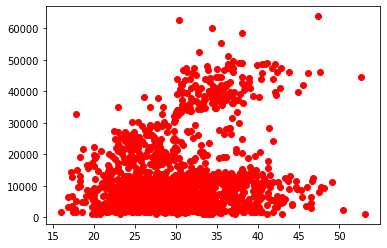

In [83]:
import matplotlib.pyplot as plt
plt.scatter(df['bmi'],df['charges'],color = 'red')
plt.show()

In [84]:
## to apply model
 
from sklearn.linear_model import Ridge

## to split the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,train_size = 0.7,random_state = 25)

model = Ridge(alpha = 1)
model.fit(x_train,y_train)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [85]:
y_pred = model.predict(x_test)
#y_pred

In [86]:
model.score(x_test,y_test)*100

73.27320337376442

In [87]:
model.score(x_train,y_train)*100

75.61850472205953

In [88]:
model.coef_

array([ 3.66998629e+03, -2.58471871e-01,  1.90475718e+03,  5.31449063e+02,
       -9.86869729e+03,  5.26258546e+02])

In [89]:
## to apply model
 
from sklearn.linear_model import Lasso

## to split the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,train_size = 0.7,random_state = 25)

model = Lasso(alpha = 1)
model.fit(x_train,y_train)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [90]:
y_pred = model.predict(x_test)
#y_pred

In [91]:
model.score(x_test,y_test)*100

73.26123621771711

In [92]:
model.score(x_train,y_train)*100

75.61859613034106

In [98]:
#a = df['bmi'].values   # to take all columns as input except one column
#b = df['charges'].values

a = df['bmi'].values.reshape(-1,1)      ## to get value from df use .values
b = df['charges'].values.reshape(-1,1)

In [100]:
## to apply model
 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(a,b)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
print(model.coef_)

[[393.8730308]]


In [103]:
print(model.intercept_)

[1192.93720896]


In [105]:
## to get all predicted values

pred = model.predict(a)
pred

array([[12181.99476821],
       [14494.02945899],
       [14190.74722528],
       ...,
       [15707.15839385],
       [11354.86140353],
       [12642.82621424]])

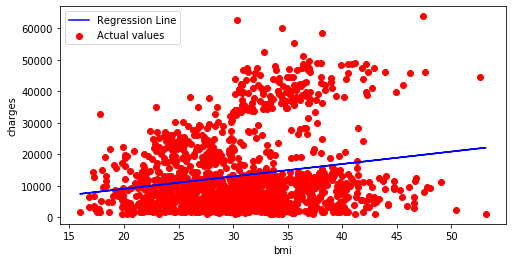

In [106]:
plt.figure(figsize = (8,4))
plt.scatter(df['bmi'],df['charges'],c ='red',label = "Actual values")
plt.plot(df['bmi'],pred,c = 'blue',label = 'Regression Line')
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend(loc = 'best')
plt.show()

In [108]:
### r2 score is evalate metric

r2 = model.score(a,b)
print("R2 Score",r2)

R2 Score 0.03933913991786253


In [109]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)   ## order we give here
x_poly = poly.fit_transform(a)      ## val should give 


In [110]:
model.fit(x_poly,b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_pred = model.predict(x_poly)
y_pred

array([[12037.04103298],
       [14879.70075945],
       [14523.05124219],
       ...,
       [16164.6526977 ],
       [11056.03139625],
       [12607.51453068]])

In [112]:
## score represented how much accuracy did it worked is given
from sklearn.metrics import r2_score,mean_squared_error

r2_score(b,y_pred)*100   ## we given actual answers and predicted answers

4.137556706506862

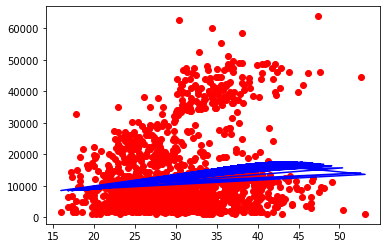

In [115]:
plt.scatter(df['bmi'],df['charges'],c = 'red')
plt.plot(a,y_pred,c='Blue')
plt.show()